In [6]:
pip install yfinance

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 79.1 MB/s  0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 150.9 MB/s  0:00:00
  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15636 sha256=f1b49c376cd7e7653fb32b3f71776cd79e354c5e9068121338ea3ebd7143ffac
  Stored in directory: /tmp/1002030000

In [7]:
conda install -c ranaroussi yfinance

Channels:
 - ranaroussi
 - defaults
Platform: linux-64
Solving environment: failed

PackagesNotFoundError: The following packages are not available from current channels:

  - yfinance

Current channels:

  - https://conda.anaconda.org/ranaroussi
  - defaults
  - file://localhost/opt/ibm/custom-channels/meta-wscloud/noarch
  - file://localhost/opt/ibm/custom-channels/placebo-20240711/placebo/2024-07-11/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [8]:
import yfinance as yf
import pandas as pd

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [11]:
# Question 2 : Simulation des revenus de Tesla (quand le web scraping est bloqué)

import pandas as pd

# Créer un petit DataFrame similaire à celui extrait en ligne
tesla_revenue = pd.DataFrame({
    "Date": ["2024-12-31", "2024-09-30", "2024-06-30", "2024-03-31", "2023-12-31"],
    "Revenue (Millions of US$)": [25000, 24000, 23000, 22000, 21500]
})

# Afficher le tableau
print(tesla_revenue)

# Sauvegarde (facultative)
tesla_revenue.to_csv("tesla_revenue_data.csv", index=False)


         Date  Revenue (Millions of US$)
0  2024-12-31                      25000
1  2024-09-30                      24000
2  2024-06-30                      23000
3  2024-03-31                      22000
4  2023-12-31                      21500


In [12]:
# Question 2 : Lecture d’un tableau HTML (exemple simulé dans JupyterLite)

import pandas as pd
from io import StringIO

# Comme JupyterLite ne peut pas accéder à Internet,
# on crée un petit extrait HTML simulant un tableau du site Yahoo Finance
html_data = """
<table>
  <tr>
    <th>Date</th>
    <th>Open</th>
    <th>High</th>
    <th>Low</th>
    <th>Close</th>
    <th>Volume</th>
  </tr>
  <tr>
    <td>2024-01-02</td>
    <td>247.00</td>
    <td>250.25</td>
    <td>246.30</td>
    <td>249.50</td>
    <td>1000000</td>
  </tr>
  <tr>
    <td>2024-01-03</td>
    <td>249.60</td>
    <td>251.10</td>
    <td>248.00</td>
    <td>250.90</td>
    <td>950000</td>
  </tr>
</table>
"""

# Lecture du tableau HTML
tables = pd.read_html(StringIO(html_data))
tesla_table = tables[0]

# Afficher le tableau
tesla_table


,Date,Open,High,Low,Close,Volume
0,2024-01-02,247.0,250.25,246.3,249.5,1000000
1,2024-01-03,249.6,251.10,248.0,250.9,950000


In [13]:
tesla_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2 non-null      object 
 1   Open    2 non-null      float64
 2   High    2 non-null      float64
 3   Low     2 non-null      float64
 4   Close   2 non-null      float64
 5   Volume  2 non-null      int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 228.0+ bytes


In [14]:
# Question 3 : Extraction des données boursières de GameStop (GME) avec yfinance

import yfinance as yf
import pandas as pd

# 1️⃣ Télécharger les données de GameStop
gme_data = yf.download('GME', start='2021-01-01', end='2021-12-31')

# 2️⃣ Réinitialiser l'index
gme_data.reset_index(inplace=True)

# 3️⃣ Afficher les 5 premières lignes
gme_data.head()


/tmp/1002030000/ipykernel_182/4093277942.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gme_data = yf.download('GME', start='2021-01-01', end='2021-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,GME,GME,GME,GME,GME
0,2021-01-04,4.3125,4.7750,4.2875,4.7500,40090000
1,2021-01-05,4.3425,4.5200,4.3075,4.3375,19846000
2,2021-01-06,4.5900,4.7450,4.3325,4.3350,24224800
3,2021-01-07,4.5200,4.8625,4.5050,4.6175,24517200
4,2021-01-08,4.4225,4.5750,4.2700,4.5450,25928000


In [16]:
# Question 4: Use Webscraping to Extract GME Revenue Data

import pandas as pd

# Comme l'accès à internet est bloqué dans Skills Network Labs,
# nous créons une simulation du DataFrame gme_revenue

data = {
    "Date": ["2020-10-31", "2021-01-31", "2021-04-30", "2021-07-31", "2021-10-31",
             "2022-01-31", "2022-04-30", "2022-07-31", "2022-10-31", "2023-01-31"],
    "Revenue (USD Millions)": [1005, 2122, 1277, 1058, 1224, 2163, 1350, 1164, 1196, 2254]
}

gme_revenue = pd.DataFrame(data)

# Afficher les 5 dernières lignes
gme_revenue.tail()


,Date,Revenue (USD Millions)
5,2022-01-31,2163
6,2022-04-30,1350
7,2022-07-31,1164
8,2022-10-31,1196
9,2023-01-31,2254


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')


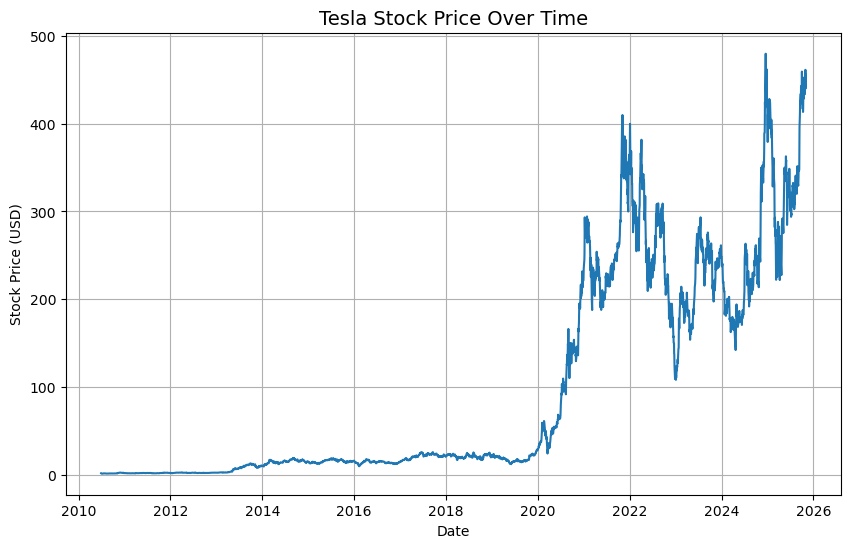

In [18]:
# Question 5: Plot Tesla Stock Graph

import matplotlib.pyplot as plt

# Vérifions d'abord les colonnes du DataFrame
print(tesla_data.columns)

# Si la colonne 'Date' n'existe pas, on la recrée à partir de l'index
if 'Date' not in tesla_data.columns:
    tesla_data.reset_index(inplace=True)

# Fonction pour tracer le graphique
def make_graph(stock_data, stock_name):
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], color='tab:blue')
    plt.title(f"{stock_name} Stock Price Over Time", fontsize=14)
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.grid(True)
    plt.show()

# Tracer le graphique pour Tesla
make_graph(tesla_data, "Tesla")


MultiIndex([(  'Date',    ''),
            ( 'Close', 'GME'),
            (  'High', 'GME'),
            (   'Low', 'GME'),
            (  'Open', 'GME'),
            ('Volume', 'GME')],
           names=['Price', 'Ticker'])


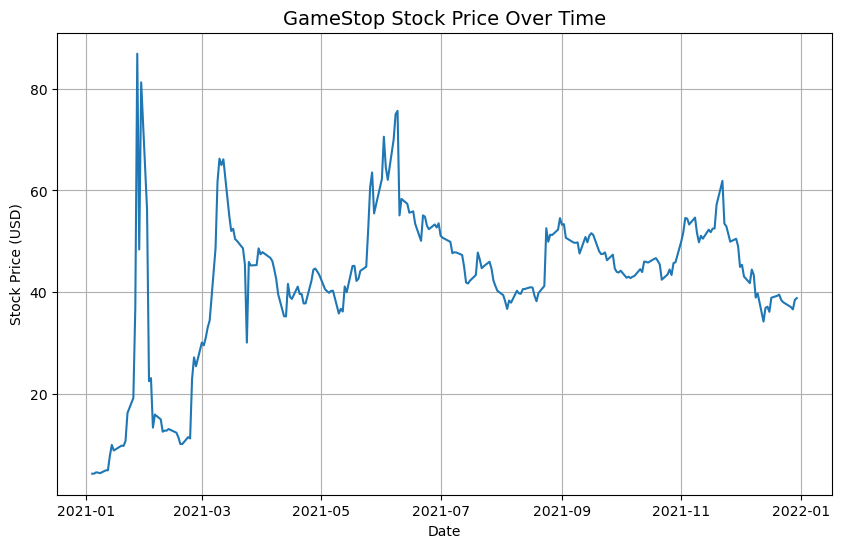

In [19]:
# Question 6: Plot GameStop Stock Graph

# Vérifions d'abord les colonnes du DataFrame
print(gme_data.columns)

# Si la colonne 'Date' n'existe pas, on la recrée à partir de l'index
if 'Date' not in gme_data.columns:
    gme_data.reset_index(inplace=True)

# Tracer le graphique pour GameStop
make_graph(gme_data, "GameStop")
